In [1]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import keras

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D, Flatten
from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math

[0 1]


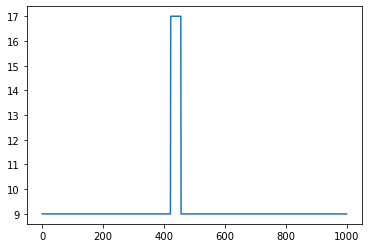

[0 1]


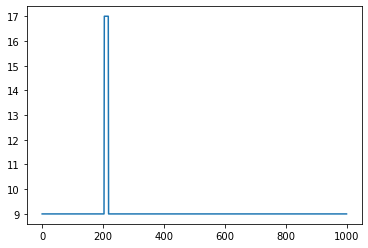

[0 0]


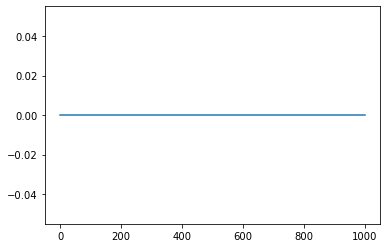

[0 0]


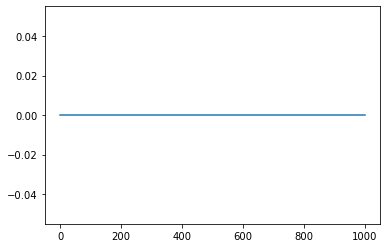

[1 0]


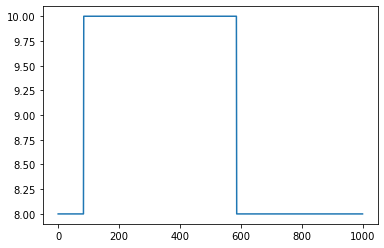

[0 0]


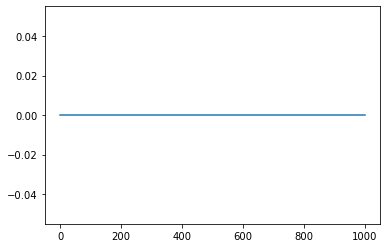

[0 1]


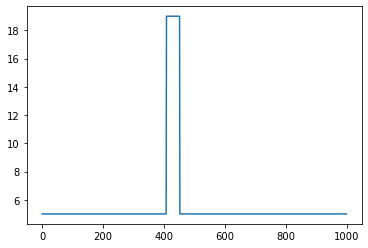

[1 0]


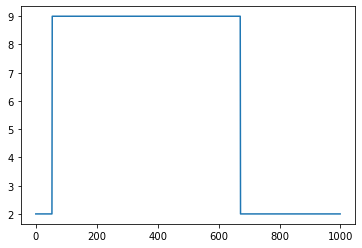

[0 1]


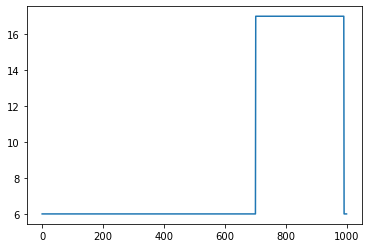

[0 0]


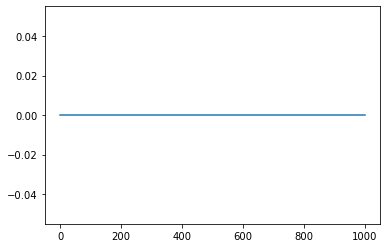

[1 0]


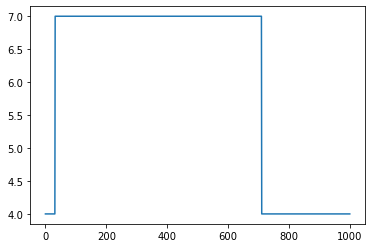

In [91]:
#Compute a random value for each the floor, bandwidth, center frequency, and height of  the signal
#When computing labels, [0,0] is no signal, [0,1] is a small signal, and [1,0] is a large signal (Large is signals over 500 units)

random.seed(10)

Data = {
    "floor" : np.zeros(1000),
    "bandwidth" : np.zeros(1000),
    "center" : np.zeros(1000),
    "height" : np.zeros(1000)
}

labels = []
dataset = []

none = np.array([0,0])
small = np.array([0,1])
large = np.array([1,0])


for i in range (0, 10001):
    
    Data["floor"] = random.randrange(0, 15, 1)
    Data["bandwidth"] = random.randrange(0, 1000, 1)
    Data["center"] = random.randrange(0, 1000, 1)
    Data["height"] = random.randrange(1, 15, 1)

#Compute the start and end points of the signal
    start = Data["center"] - (Data["bandwidth"]/2)
    end = Data["center"] + (Data["bandwidth"]/2)

    start = round(start)
    end = round(end)
    
#Compute the output rectangle, if out of range display an error    
    rectangle = np.zeros(1000)

    #print("Starting Frequency: ", start)
    if start < 0 or end > 1000:
        rectangle[0:1000] = 0;
        dataset.append(rectangle)
        labels.append(none)
    else:
        rectangle[0:1000] = Data["floor"]
        for n in range(start, end):
            rectangle[n] = rectangle[n] + Data["height"]
        dataset.append(rectangle)
        if Data["bandwidth"] >= 500:
            labels.append(large)
        else:
            labels.append(small)
            
            
for i in range (0,11):
     print(labels[i])
     plt.figure()
     plt.plot(range(0,1000), dataset[i])
     plt.show()

#print(labels)

# Initial Test
Using the code that was given only modified to use my dataset.

Model: "functional_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 981, 5)            105       
_________________________________________________________________
max_pooling1d_59 (MaxPooling (None, 196, 5)            0         
_________________________________________________________________
flatten_59 (Flatten)         (None, 980)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 1962      
Total params: 2,067
Trainable params: 2,067
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
126/126 [==============================] - 1s 11ms/step - loss: 0.3654 - accuracy: 0.3780 - val_loss: 0.3

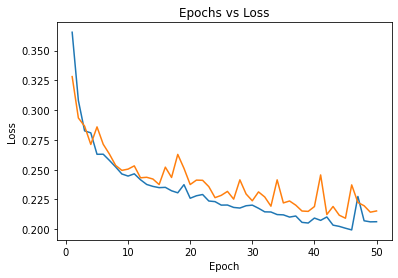

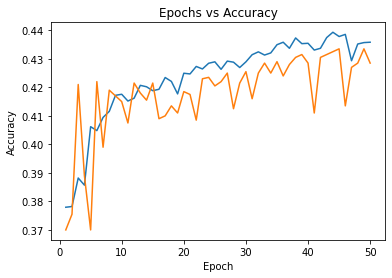

16/16 [==============================] - 0s 5ms/step - loss: 0.2153 - accuracy: 0.4285
test loss, test acc: [0.2153424620628357, 0.4284999966621399]


In [92]:

# vector input
input = Input(shape=(1000,1))
# fully connected layer w/ 1024 nodes
layer1 = Conv1D(5, 20,activation="sigmoid")(input)
layer2 = MaxPooling1D(5)(layer1)
layer3 = Flatten()(layer2)
# binary 'classifier' layer
output = Dense(2, activation="sigmoid")(layer3)

# set the input and output layers
model = Model(inputs=input, outputs=output)
model.summary() # print layer info

# tell tensorflow what optimizer/loss function
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

# now ready for data

allX = dataset # list of 1000-sample vectors
allY = labels # list of labels

#print(allX)

trainX = []; testX = []
trainY = []; testY = []

N = len(allX)
indexes = list(range(N))
np.random.shuffle(indexes)

M = int(N* 0.2) # 80/20 train/test split

for idx in indexes[0:M] :
    testX.append(allX[idx])
    testY.append(allY[idx])


for idx in indexes[M:] :
    trainX.append(allX[idx])
    trainY.append(allY[idx])


# ok, now we're ready to train.
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

#print('Train X: ', trainX)
#print('Train Y: ', trainY)
#print('Test X: ' , testX)
#print('Test Y: ' , testY)
      

history = model.fit(trainX, trainY, epochs=50, batch_size=64,
          validation_data=(testX, testY))

#here we go.

training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_accuracy = history.history ['accuracy']
test_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, label = "Training Loss")
plt.plot(epoch_count, test_loss, label = "Test Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

plt.plot(epoch_count, training_accuracy, label = 'Training Accuracy')
plt.plot(epoch_count, test_accuracy, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

results = model.evaluate(testX, testY, batch_size=128)
print("test loss, test acc:", results)

# results = model.predict(testX)
# results = np.round(results)
# y_pred = results.astype('int')
# results = []
# y_true = []

# for i in range(len(y_pred)):
#     if np.array_equal(y_pred[i], [0,0]):
#         results.append(0)
#     elif np.array_equal(y_pred[i], [0,1]):
#         results.append(1)
#     else: 
#         results.append(2)
   
# for i in range(len(testX)):
#     if np.array_equal(testY[i],[0,0]):
#         y_true.append(0)
#     elif np.array_equal(testY[i],[0,1]):
#         y_true.append(1)
#     else: 
#         y_true.append(2)

# for i in range(0, 10):
#     print('Predicted', results[i], 'Actual', y_true[i])

# confusion_matrix(y_true, results)   
    
#multilabel_confusion_matrix(testY, y_pred)


# Changing to use categorical crossentropy.
Adjusted the labels in order to use categorical crossentropy, able to obtain a much better test accuracy.

In [16]:
random.seed(10)

Data = {
    "floor" : np.zeros(1000),
    "bandwidth" : np.zeros(1000),
    "center" : np.zeros(1000),
    "height" : np.zeros(1000)
}

labels = []
dataset = []

none = np.array([1,0,0])
small = np.array([0,1,0])
large = np.array([0,0,1])


for i in range (0, 10000):
    
    Data["floor"] = random.randrange(0, 15, 1)
    Data["bandwidth"] = random.randrange(0, 1000, 1)
    Data["center"] = random.randrange(0, 1000, 1)
    Data["height"] = random.randrange(1, 15, 1)

#Compute the start and end points of the signal
    start = Data["center"] - (Data["bandwidth"]/2)
    end = Data["center"] + (Data["bandwidth"]/2)

    start = round(start)
    end = round(end)
    
#Compute the output rectangle, if out of range display an error    
    rectangle = np.zeros(1000)

    #print("Starting Frequency: ", start)
    if start < 0 or end > 1000:
        rectangle[0:1000] = 0;
        dataset.append(rectangle)
        labels.append(none)
    else:
        rectangle[0:1000] = Data["floor"]
        for n in range(start, end):
            rectangle[n] = rectangle[n] + Data["height"]
        dataset.append(rectangle)
        if Data["bandwidth"] >= 500:
            labels.append(large)
        else:
            labels.append(small)
            
#print(labels)

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 996, 7)            42        
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 199, 7)            0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1393)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 4182      
Total params: 4,224
Trainable params: 4,224
Non-trainable params: 0
_________________________________________________________________
Train X:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [7. 7. 7. ... 7. 7. 7.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [

Epoch 48/50
125/125 [==============================] - 1s 11ms/step - loss: 0.1761 - accuracy: 0.9331 - val_loss: 0.2057 - val_accuracy: 0.9190
Epoch 49/50
125/125 [==============================] - 1s 11ms/step - loss: 0.1758 - accuracy: 0.9350 - val_loss: 0.2194 - val_accuracy: 0.9140
Epoch 50/50
125/125 [==============================] - 1s 11ms/step - loss: 0.1781 - accuracy: 0.9317 - val_loss: 0.2007 - val_accuracy: 0.9225


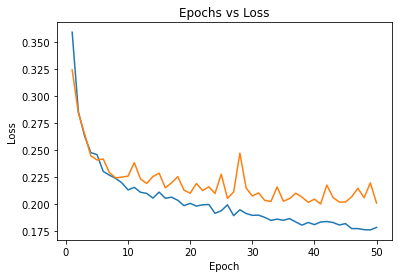

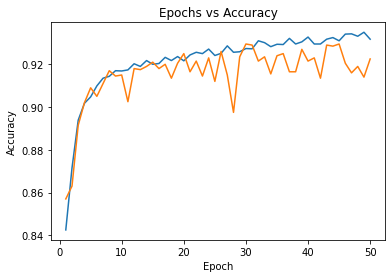

16/16 [==============================] - 0s 8ms/step - loss: 0.2007 - accuracy: 0.9225
test loss, test acc: [0.2007203996181488, 0.9225000143051147]
Predicted:  0  True:  0
Predicted:  1  True:  1
Predicted:  1  True:  1
Predicted:  1  True:  1
Predicted:  0  True:  0
Predicted:  0  True:  0
Predicted:  1  True:  1
Predicted:  0  True:  0
Predicted:  1  True:  1
Predicted:  0  True:  0


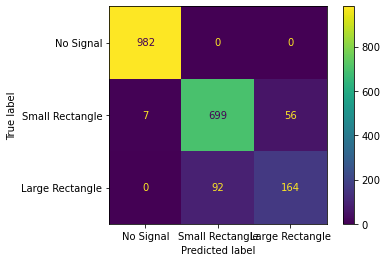

In [21]:
# vector input
input = Input(shape=(1000,1))
# fully connected layer w/ 1024 nodes
layer1 = Conv1D(7, 5,activation="sigmoid")(input)
layer2 = MaxPooling1D(5)(layer1)
layer3 = Flatten()(layer2)
#Classification layer
output = Dense(3, activation="sigmoid")(layer3)

# set the input and output layers
model = Model(inputs=input, outputs=output)
model.summary() # print layer info

# tell tensorflow what optimizer/loss function
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# now ready for data

allX = dataset # list of 1000-sample vectors
allY = labels # list of labels

#print(allX)

trainX = []; testX = []
trainY = []; testY = []

N = len(allX)
indexes = list(range(N))
np.random.shuffle(indexes)

M = int(N* 0.2) # 80/20 train/test split

for idx in indexes[0:M] :
    testX.append(allX[idx])
    testY.append(allY[idx])


for idx in indexes[M:] :
    trainX.append(allX[idx])
    trainY.append(allY[idx])


# ok, now we're ready to train.
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

print('Train X: ', trainX)
print('Train Y: ', trainY)
print('Test X: ' , testX)
print('Test Y: ' , testY)
      

history = model.fit(trainX, trainY, epochs=50, batch_size=64,
          validation_data=(testX, testY))

#here we go.

training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_accuracy = history.history ['accuracy']
test_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, label = "Training Loss")
plt.plot(epoch_count, test_loss, label = "Test Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

plt.plot(epoch_count, training_accuracy, label = 'Training Accuracy')
plt.plot(epoch_count, test_accuracy, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

results = model.evaluate(testX, testY, batch_size=128)
print("test loss, test acc:", results)

results = model.predict(testX)
y_true = []
y_pred = []

for i in range(len(results)):
    y_pred.append(np.argmax(results[i]))
    
for i in range(len(testX)):
    y_true.append(np.argmax(testY[i]))
    
for i in range(0, 10):
    print('Predicted: ', y_pred[i], ' True: ', y_true[i])
    
matrix = confusion_matrix(y_true, y_pred)
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=['No Signal','Small Rectangle', 'Large Rectangle'])
matrix_display.plot()

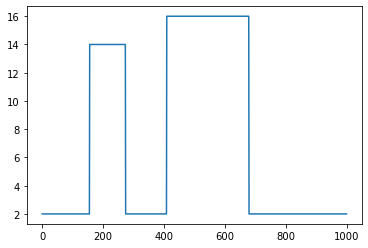

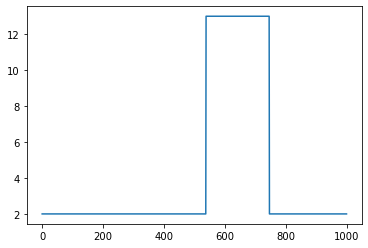

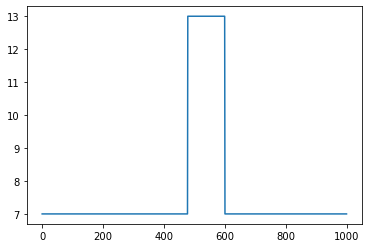

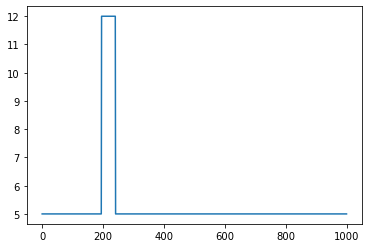

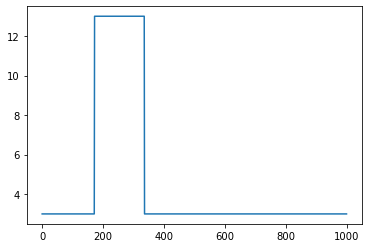

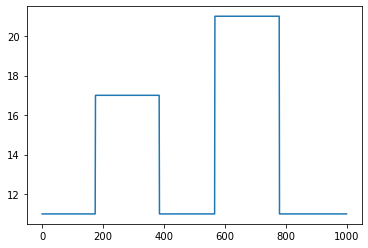

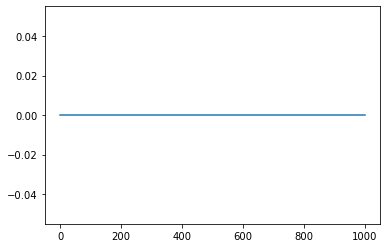

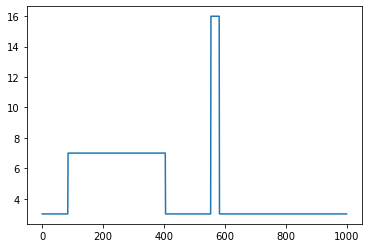

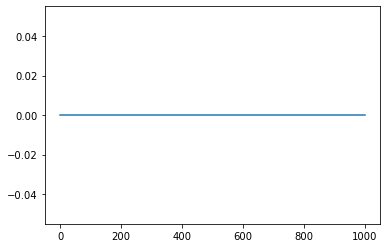

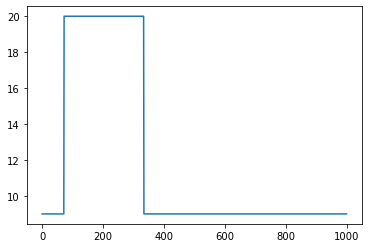

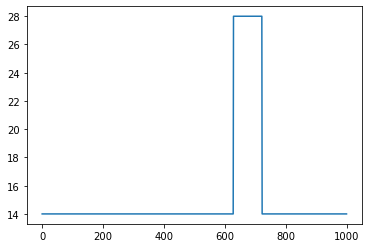

In [22]:
#random.seed(10)

Data = {
    "floor" : np.zeros(1000),
    "bandwidth" : np.zeros(1000),
    "center" : np.zeros(1000),
    "height" : np.zeros(1000)
}

Data2 = {
    "floor" : np.zeros(1000),
    "bandwidth" : np.zeros(1000),
    "center" : np.zeros(1000),
    "height" : np.zeros(1000)
}

labels = []
dataset = []

none = np.array([1,0,0])
one = np.array([0,1,0])
two = np.array([0,0,1])


for i in range (0, 10000):
    
    count = random.randrange(0,3,1)
    select = random.randrange(1,3,1)
    
    Data["floor"] = random.randrange(0, 15, 1)
    Data["bandwidth"] = random.randrange(0, 340, 1)
    Data["center"] = random.randrange(190, 300, 1)
    Data["height"] = random.randrange(1, 15, 1)
    
    Data2["bandwidth"] = random.randrange(0,340, 1)
    Data2["center"] = random.randrange(500, 700, 1)
    Data2["height"] = random.randrange(1, 15, 1)

#Compute the start and end points of the signal
    start = Data["center"] - (Data["bandwidth"]/2)
    end = Data["center"] + (Data["bandwidth"]/2)
    
    start2 = Data2["center"] - (Data2["bandwidth"]/2)
    end2 = Data2["center"] + (Data2["bandwidth"]/2)

    start = round(start)
    end = round(end)
    
    start2 = round(start2)
    end2 = round(end2)
    
#Compute the output rectangle, if out of range display an error    
    signal = np.zeros(1000)
    
    if count == 0:
        signal[0:1000] = 0;
        dataset.append(signal)
        labels.append(none)
    elif count == 1:
        signal[0:1000] = Data["floor"]
        if select == 1:
            for n in range(start, end):
                signal[n] = signal[n] + Data["height"]
        elif select == 2:
            for n in range(start2, end2):
                signal[n] = signal[n] + Data2["height"]
        dataset.append(signal)
        labels.append(one)
    elif count == 2:
        signal[0:1000] = Data["floor"]
        for n in range(start, end):
                signal[n] = signal[n] + Data["height"]
        for n in range(start2, end2):
                signal[n] = signal[n] + Data2["height"]
        dataset.append(signal)
        labels.append(two)
    
    #plt.figure()
    #plt.plot(range(0,1000), signal)
    #plt.show()    
for i in range (0,11):
     plt.figure()
     plt.plot(range(0,1000), dataset[i])
     plt.show()            
#print(labels)

Model: "functional_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 996, 5)            30        
_________________________________________________________________
max_pooling1d_31 (MaxPooling (None, 199, 5)            0         
_________________________________________________________________
max_pooling1d_32 (MaxPooling (None, 28, 5)             0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 140)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 423       
Total params: 453
Trainable params: 453
Non-trainable params: 0
_______________________________________________________

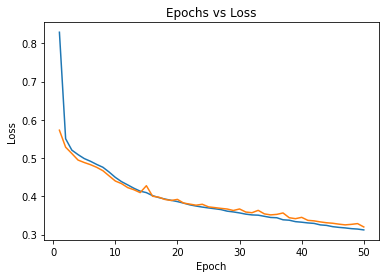

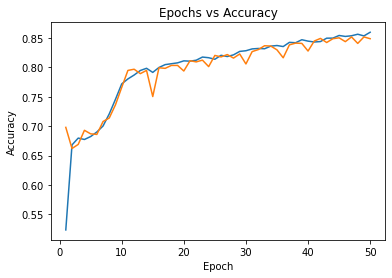

16/16 [==============================] - 0s 7ms/step - loss: 0.3198 - accuracy: 0.8490
test loss, test acc: [0.3198320269584656, 0.8489999771118164]
Predicted:  2  True:  2
Predicted:  1  True:  1
Predicted:  1  True:  2
Predicted:  1  True:  2
Predicted:  2  True:  2
Predicted:  0  True:  0
Predicted:  0  True:  0
Predicted:  2  True:  2
Predicted:  1  True:  1
Predicted:  2  True:  1


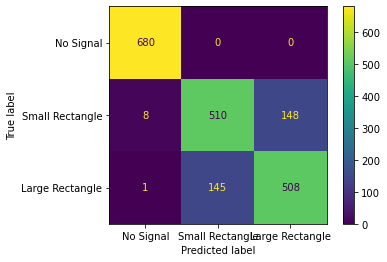

In [34]:

input = Input(shape=(1000,1))
# fully connected layer w/ 1024 nodes
layer1 = Conv1D(5, 5,activation="sigmoid")(input)
layer2 = MaxPooling1D(5)(layer1)
layer3 = MaxPooling1D(7)(layer2)
layer4 = Flatten()(layer3)
#'classifier' layer
output = Dense(3, activation="sigmoid")(layer4)

# set the input and output layers
model = Model(inputs=input, outputs=output)
model.summary() # print layer info

# tell tensorflow what optimizer/loss function
model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# now ready for data

allX = dataset # list of 1000-sample vectors
allY = labels # list of labels

#print(allX)

trainX = []; testX = []
trainY = []; testY = []

N = len(allX)
indexes = list(range(N))
np.random.shuffle(indexes)

M = int(N* 0.2) # 80/20 train/test split

for idx in indexes[0:M] :
    testX.append(allX[idx])
    testY.append(allY[idx])


for idx in indexes[M:] :
    trainX.append(allX[idx])
    trainY.append(allY[idx])


# ok, now we're ready to train.
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

print('Train X: ', trainX)
print('Train Y: ', trainY)
print('Test X: ' , testX)
print('Test Y: ' , testY)
      

history = model.fit(trainX, trainY, epochs=50, batch_size=64,
          validation_data=(testX, testY))

#here we go.

training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_accuracy = history.history ['accuracy']
test_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, label = "Training Loss")
plt.plot(epoch_count, test_loss, label = "Test Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.show()

plt.plot(epoch_count, training_accuracy, label = 'Training Accuracy')
plt.plot(epoch_count, test_accuracy, label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy')
plt.show()

results = model.evaluate(testX, testY, batch_size=128)
print("test loss, test acc:", results)


results = model.predict(testX)
y_true = []
y_pred = []

for i in range(len(results)):
    y_pred.append(np.argmax(results[i]))
    
for i in range(len(testX)):
    y_true.append(np.argmax(testY[i]))
    
for i in range(0, 10):
    print('Predicted: ', y_pred[i], ' True: ', y_true[i])
    
matrix = confusion_matrix(y_true, y_pred)
matrix_display = ConfusionMatrixDisplay(matrix, display_labels=['No Signal','Small Rectangle', 'Large Rectangle'])
matrix_display.plot()

# Shifting to a regression problem to find bandwidth, center frequency, and SNR. Generating cartoon signals with randomized values, then inputting into a NN.

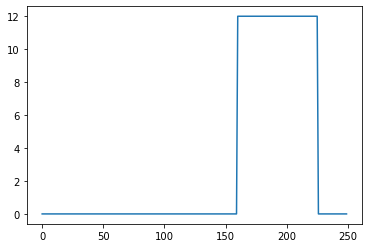

[193, 66, 12]


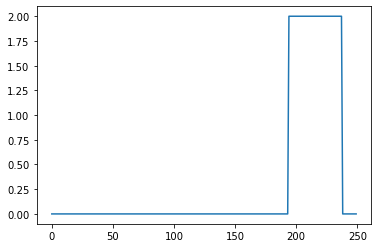

[216, 44, 2]


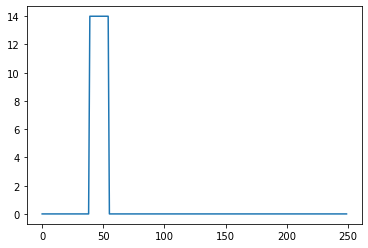

[47, 16, 14]


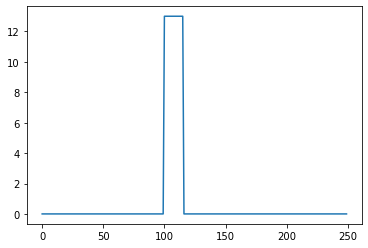

[108, 16, 13]


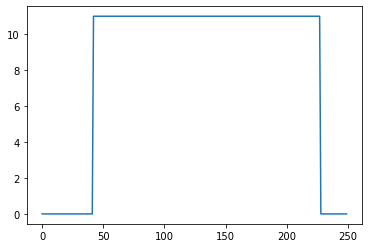

[135, 185, 11]


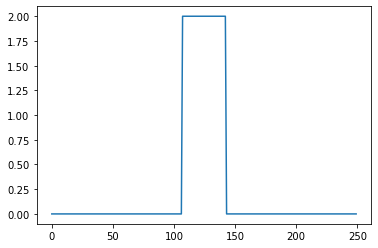

[125, 36, 2]


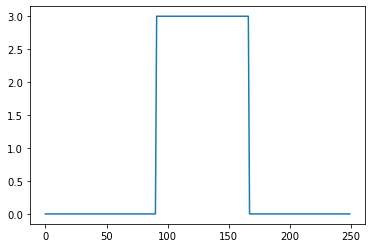

[129, 76, 3]


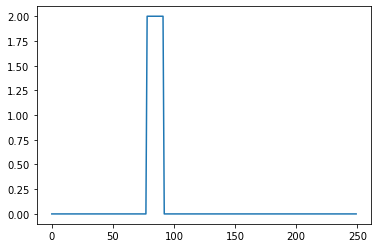

[85, 13, 2]


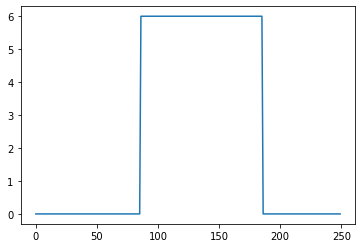

[136, 99, 6]


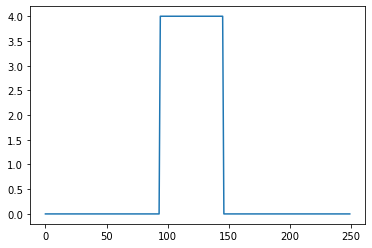

[120, 53, 4]


In [10]:
Data = {
    "floor" : np.zeros(250),
    "bandwidth" : np.zeros(250),
    "center" : np.zeros(250),
    "height" : np.zeros(250)
}

params = np.zeros(2)

labels = []
dataset = []

for i in range (0, 10000):
    
    Data["floor"] = 0
    Data["bandwidth"] = random.randrange(2, 250, 1)
    Data["center"] = random.randrange(0, 250, 1)
    Data["height"] = random.randrange(1, 15, 1)

#Compute the start and end points of the signal
    start = Data["center"] - (Data["bandwidth"]/2)
    end = Data["center"] + (Data["bandwidth"]/2)

    start = round(start)
    end = round(end)
    
    while start < 0 or end > 249:
        Data["bandwidth"] = random.randrange(0, 1000, 1)
        Data["center"] = random.randrange(0, 1000, 1)
    
        start = Data["center"] - (Data["bandwidth"]/2)
        end = Data["center"] + (Data["bandwidth"]/2)
    
        start = round(start)
        end = round(end)
                    
#Compute the output rectangle, if out of range display an error    
    rectangle = np.zeros(250)

    rectangle[0:250] = Data["floor"]
    
    for n in range(start, end):
        rectangle[n] = rectangle[n] + Data["height"]
    dataset.append(rectangle)
    
    params = [Data["center"],Data["bandwidth"],Data["height"]]
    labels.append(params)
 
  
for i in range (0,10):
     plt.figure()
     plt.plot(range(0,250), dataset[i])
     plt.show()
     print(labels[i])

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 250, 1)]          0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 248, 16)           64        
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 124, 16)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 122, 64)           3136      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 61, 64)            0         
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 30, 64)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1920)            

80/80 [==============================] - 1s 19ms/step - loss: 67.0623 - mean_absolute_error: 3.7590 - val_loss: 65.5032 - val_mean_absolute_error: 3.8191
Epoch 38/1000
80/80 [==============================] - 1s 17ms/step - loss: 67.8563 - mean_absolute_error: 3.9012 - val_loss: 64.0607 - val_mean_absolute_error: 3.8167
Epoch 39/1000
80/80 [==============================] - 1s 18ms/step - loss: 64.9199 - mean_absolute_error: 3.7101 - val_loss: 64.2873 - val_mean_absolute_error: 4.0527
Epoch 40/1000
80/80 [==============================] - 1s 17ms/step - loss: 65.4810 - mean_absolute_error: 3.8684 - val_loss: 60.8960 - val_mean_absolute_error: 3.6772
Epoch 41/1000
80/80 [==============================] - 1s 18ms/step - loss: 63.3093 - mean_absolute_error: 3.6967 - val_loss: 59.3982 - val_mean_absolute_error: 3.5769
Epoch 42/1000
80/80 [==============================] - 1s 17ms/step - loss: 61.8068 - mean_absolute_error: 3.6154 - val_loss: 63.6271 - val_mean_absolute_error: 3.9743
Epoch 

Epoch 86/1000
80/80 [==============================] - 1s 17ms/step - loss: 28.1622 - mean_absolute_error: 2.2195 - val_loss: 25.6734 - val_mean_absolute_error: 2.6359
Epoch 87/1000
80/80 [==============================] - 1s 16ms/step - loss: 28.3766 - mean_absolute_error: 2.2595 - val_loss: 22.9559 - val_mean_absolute_error: 2.2570
Epoch 88/1000
80/80 [==============================] - 1s 16ms/step - loss: 29.5624 - mean_absolute_error: 2.4626 - val_loss: 24.6289 - val_mean_absolute_error: 2.4018
Epoch 89/1000
80/80 [==============================] - 1s 16ms/step - loss: 26.9724 - mean_absolute_error: 2.1569 - val_loss: 24.8311 - val_mean_absolute_error: 2.4647
Epoch 90/1000
80/80 [==============================] - 1s 16ms/step - loss: 28.0553 - mean_absolute_error: 2.2651 - val_loss: 21.5812 - val_mean_absolute_error: 2.2301
Epoch 91/1000
80/80 [==============================] - 1s 17ms/step - loss: 26.2392 - mean_absolute_error: 2.1098 - val_loss: 23.0839 - val_mean_absolute_error:

80/80 [==============================] - 1s 16ms/step - loss: 17.3432 - mean_absolute_error: 1.4298 - val_loss: 13.2288 - val_mean_absolute_error: 1.4707
Epoch 183/1000
80/80 [==============================] - 1s 16ms/step - loss: 16.8385 - mean_absolute_error: 1.3551 - val_loss: 12.0613 - val_mean_absolute_error: 1.3543
Epoch 184/1000
80/80 [==============================] - 1s 17ms/step - loss: 16.7248 - mean_absolute_error: 1.3297 - val_loss: 12.2393 - val_mean_absolute_error: 1.2993
Epoch 185/1000
80/80 [==============================] - 1s 17ms/step - loss: 16.6942 - mean_absolute_error: 1.3333 - val_loss: 11.9005 - val_mean_absolute_error: 1.2984
Epoch 186/1000
80/80 [==============================] - 1s 18ms/step - loss: 16.9525 - mean_absolute_error: 1.3694 - val_loss: 12.0042 - val_mean_absolute_error: 1.3062
Epoch 187/1000
80/80 [==============================] - 1s 17ms/step - loss: 16.7962 - mean_absolute_error: 1.3374 - val_loss: 12.7152 - val_mean_absolute_error: 1.4571
E

80/80 [==============================] - 1s 16ms/step - loss: 14.9786 - mean_absolute_error: 1.1217 - val_loss: 9.8103 - val_mean_absolute_error: 1.0839
Epoch 279/1000
80/80 [==============================] - 1s 16ms/step - loss: 15.1215 - mean_absolute_error: 1.1674 - val_loss: 9.7003 - val_mean_absolute_error: 1.0375
Epoch 280/1000
80/80 [==============================] - 1s 16ms/step - loss: 14.7914 - mean_absolute_error: 1.1306 - val_loss: 9.7231 - val_mean_absolute_error: 1.0509
Epoch 281/1000
80/80 [==============================] - 1s 16ms/step - loss: 15.2587 - mean_absolute_error: 1.2055 - val_loss: 10.1357 - val_mean_absolute_error: 1.1895
Epoch 282/1000
80/80 [==============================] - 1s 16ms/step - loss: 15.3986 - mean_absolute_error: 1.2408 - val_loss: 10.1711 - val_mean_absolute_error: 1.1414
Epoch 283/1000
80/80 [==============================] - 1s 17ms/step - loss: 15.8617 - mean_absolute_error: 1.3410 - val_loss: 10.9991 - val_mean_absolute_error: 1.3601
Epoc

Epoch 327/1000
80/80 [==============================] - 1s 16ms/step - loss: 13.1716 - mean_absolute_error: 1.0462 - val_loss: 9.7238 - val_mean_absolute_error: 1.2648
Epoch 328/1000
80/80 [==============================] - 1s 16ms/step - loss: 13.9652 - mean_absolute_error: 1.2006 - val_loss: 11.8113 - val_mean_absolute_error: 1.6928
Epoch 329/1000
80/80 [==============================] - 1s 16ms/step - loss: 14.2154 - mean_absolute_error: 1.2456 - val_loss: 10.3389 - val_mean_absolute_error: 1.3351
Epoch 330/1000
80/80 [==============================] - 1s 16ms/step - loss: 13.7529 - mean_absolute_error: 1.1591 - val_loss: 9.6275 - val_mean_absolute_error: 1.3019
Epoch 331/1000
80/80 [==============================] - 1s 16ms/step - loss: 13.3951 - mean_absolute_error: 1.1214 - val_loss: 8.1253 - val_mean_absolute_error: 0.9276
Epoch 332/1000
80/80 [==============================] - 1s 17ms/step - loss: 13.3260 - mean_absolute_error: 1.0642 - val_loss: 8.1195 - val_mean_absolute_erro

Epoch 376/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.9945 - mean_absolute_error: 1.0214 - val_loss: 8.4953 - val_mean_absolute_error: 1.0242
Epoch 377/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.8596 - mean_absolute_error: 1.0041 - val_loss: 7.8855 - val_mean_absolute_error: 0.8610
Epoch 378/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.8721 - mean_absolute_error: 1.0267 - val_loss: 7.8249 - val_mean_absolute_error: 0.8378
Epoch 379/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.8983 - mean_absolute_error: 1.0331 - val_loss: 8.7230 - val_mean_absolute_error: 1.1071
Epoch 380/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.8551 - mean_absolute_error: 1.0209 - val_loss: 10.4615 - val_mean_absolute_error: 1.4172
Epoch 381/1000
80/80 [==============================] - 1s 17ms/step - loss: 13.3454 - mean_absolute_error: 1.1230 - val_loss: 10.5076 - val_mean_absolute_erro

Epoch 425/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.3743 - mean_absolute_error: 0.9128 - val_loss: 8.9945 - val_mean_absolute_error: 1.1998
Epoch 426/1000
80/80 [==============================] - 1s 16ms/step - loss: 13.4811 - mean_absolute_error: 1.1672 - val_loss: 8.7248 - val_mean_absolute_error: 1.1129
Epoch 427/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.8082 - mean_absolute_error: 1.0207 - val_loss: 8.1964 - val_mean_absolute_error: 0.9830
Epoch 428/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.7930 - mean_absolute_error: 1.0334 - val_loss: 7.8126 - val_mean_absolute_error: 0.8901
Epoch 429/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.3704 - mean_absolute_error: 0.9360 - val_loss: 8.3364 - val_mean_absolute_error: 1.0404
Epoch 430/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.5917 - mean_absolute_error: 1.0007 - val_loss: 9.7229 - val_mean_absolute_error:

Epoch 474/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.2483 - mean_absolute_error: 0.9053 - val_loss: 7.3438 - val_mean_absolute_error: 0.7363
Epoch 475/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.9928 - mean_absolute_error: 0.8311 - val_loss: 7.6782 - val_mean_absolute_error: 0.8526
Epoch 476/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.5870 - mean_absolute_error: 0.9795 - val_loss: 7.8231 - val_mean_absolute_error: 0.9109
Epoch 477/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.3890 - mean_absolute_error: 0.9532 - val_loss: 7.8186 - val_mean_absolute_error: 0.9155
Epoch 478/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.2418 - mean_absolute_error: 0.8994 - val_loss: 7.3464 - val_mean_absolute_error: 0.7490
Epoch 479/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.5698 - mean_absolute_error: 0.9767 - val_loss: 8.5248 - val_mean_absolute_error:

Epoch 523/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.5703 - mean_absolute_error: 1.0161 - val_loss: 7.3914 - val_mean_absolute_error: 0.7747
Epoch 524/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.8652 - mean_absolute_error: 0.7989 - val_loss: 8.1664 - val_mean_absolute_error: 1.0146
Epoch 525/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.3892 - mean_absolute_error: 0.9577 - val_loss: 7.9105 - val_mean_absolute_error: 0.9364
Epoch 526/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.2504 - mean_absolute_error: 0.9316 - val_loss: 7.9337 - val_mean_absolute_error: 0.9351
Epoch 527/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.5857 - mean_absolute_error: 1.0144 - val_loss: 8.7566 - val_mean_absolute_error: 1.1778
Epoch 528/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.2692 - mean_absolute_error: 0.9247 - val_loss: 8.1603 - val_mean_absolute_error:

Epoch 572/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.4554 - mean_absolute_error: 0.9716 - val_loss: 8.0324 - val_mean_absolute_error: 0.9629
Epoch 573/1000
80/80 [==============================] - 1s 17ms/step - loss: 12.2880 - mean_absolute_error: 0.9175 - val_loss: 7.2568 - val_mean_absolute_error: 0.7765
Epoch 574/1000
80/80 [==============================] - 2s 19ms/step - loss: 12.2785 - mean_absolute_error: 0.9784 - val_loss: 7.2798 - val_mean_absolute_error: 0.8512
Epoch 575/1000
80/80 [==============================] - 1s 17ms/step - loss: 12.3988 - mean_absolute_error: 1.0085 - val_loss: 8.4279 - val_mean_absolute_error: 1.1870
Epoch 576/1000
80/80 [==============================] - 1s 17ms/step - loss: 12.3007 - mean_absolute_error: 1.0015 - val_loss: 7.9113 - val_mean_absolute_error: 1.0508
Epoch 577/1000
80/80 [==============================] - 1s 18ms/step - loss: 11.9400 - mean_absolute_error: 0.8892 - val_loss: 8.2183 - val_mean_absolute_error:

Epoch 621/1000
80/80 [==============================] - 1s 17ms/step - loss: 12.1653 - mean_absolute_error: 0.9155 - val_loss: 7.0647 - val_mean_absolute_error: 0.7051
Epoch 622/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.8838 - mean_absolute_error: 0.8349 - val_loss: 7.7187 - val_mean_absolute_error: 0.9357
Epoch 623/1000
80/80 [==============================] - 1s 18ms/step - loss: 12.1243 - mean_absolute_error: 0.9401 - val_loss: 7.7831 - val_mean_absolute_error: 0.9719
Epoch 624/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.9098 - mean_absolute_error: 0.8840 - val_loss: 7.6614 - val_mean_absolute_error: 0.9584
Epoch 625/1000
80/80 [==============================] - 1s 17ms/step - loss: 12.1325 - mean_absolute_error: 0.9578 - val_loss: 7.7708 - val_mean_absolute_error: 0.9703
Epoch 626/1000
80/80 [==============================] - 1s 17ms/step - loss: 12.3354 - mean_absolute_error: 0.9600 - val_loss: 7.2160 - val_mean_absolute_error:

Epoch 670/1000
80/80 [==============================] - 1s 16ms/step - loss: 12.2200 - mean_absolute_error: 1.0154 - val_loss: 7.5045 - val_mean_absolute_error: 0.9446
Epoch 671/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.4964 - mean_absolute_error: 0.7772 - val_loss: 9.2088 - val_mean_absolute_error: 1.3269
Epoch 672/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.8113 - mean_absolute_error: 0.9123 - val_loss: 7.1416 - val_mean_absolute_error: 0.7952
Epoch 673/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.5456 - mean_absolute_error: 0.8160 - val_loss: 7.1674 - val_mean_absolute_error: 0.8310
Epoch 674/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.6278 - mean_absolute_error: 0.8396 - val_loss: 7.2662 - val_mean_absolute_error: 0.8741
Epoch 675/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.6599 - mean_absolute_error: 0.8567 - val_loss: 7.7636 - val_mean_absolute_error:

Epoch 719/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.8446 - mean_absolute_error: 0.9415 - val_loss: 7.6970 - val_mean_absolute_error: 1.0474
Epoch 720/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.5032 - mean_absolute_error: 0.8364 - val_loss: 6.7310 - val_mean_absolute_error: 0.7183
Epoch 721/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.2243 - mean_absolute_error: 0.7910 - val_loss: 6.6545 - val_mean_absolute_error: 0.7153
Epoch 722/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1837 - mean_absolute_error: 0.7409 - val_loss: 6.9082 - val_mean_absolute_error: 0.8450
Epoch 723/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.2125 - mean_absolute_error: 0.7401 - val_loss: 7.0508 - val_mean_absolute_error: 0.8790
Epoch 724/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.3602 - mean_absolute_error: 0.8235 - val_loss: 6.6414 - val_mean_absolute_error:

Epoch 768/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.4394 - mean_absolute_error: 0.8254 - val_loss: 7.4112 - val_mean_absolute_error: 0.9884
Epoch 769/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.6765 - mean_absolute_error: 0.9487 - val_loss: 7.6141 - val_mean_absolute_error: 1.0645
Epoch 770/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.2034 - mean_absolute_error: 0.7808 - val_loss: 6.4730 - val_mean_absolute_error: 0.6341
Epoch 771/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1940 - mean_absolute_error: 0.7439 - val_loss: 6.7549 - val_mean_absolute_error: 0.7416
Epoch 772/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.2652 - mean_absolute_error: 0.8002 - val_loss: 6.9893 - val_mean_absolute_error: 0.8644
Epoch 773/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.2297 - mean_absolute_error: 0.7674 - val_loss: 6.5823 - val_mean_absolute_error:

Epoch 817/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.2135 - mean_absolute_error: 0.8000 - val_loss: 6.7441 - val_mean_absolute_error: 0.8089
Epoch 818/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.2663 - mean_absolute_error: 0.7868 - val_loss: 6.6175 - val_mean_absolute_error: 0.7412
Epoch 819/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.4428 - mean_absolute_error: 0.8307 - val_loss: 7.1242 - val_mean_absolute_error: 0.8938
Epoch 820/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.5372 - mean_absolute_error: 0.8771 - val_loss: 6.8577 - val_mean_absolute_error: 0.8703
Epoch 821/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.0338 - mean_absolute_error: 0.6941 - val_loss: 6.4169 - val_mean_absolute_error: 0.6410
Epoch 822/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1935 - mean_absolute_error: 0.7607 - val_loss: 6.4715 - val_mean_absolute_error:

Epoch 866/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.0900 - mean_absolute_error: 0.7263 - val_loss: 6.8993 - val_mean_absolute_error: 0.8191
Epoch 867/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1733 - mean_absolute_error: 0.7315 - val_loss: 6.3432 - val_mean_absolute_error: 0.6024
Epoch 868/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1851 - mean_absolute_error: 0.7526 - val_loss: 6.8210 - val_mean_absolute_error: 0.8334
Epoch 869/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.4303 - mean_absolute_error: 0.8382 - val_loss: 8.0141 - val_mean_absolute_error: 1.0724
Epoch 870/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1395 - mean_absolute_error: 0.7252 - val_loss: 6.4675 - val_mean_absolute_error: 0.6619
Epoch 871/1000
80/80 [==============================] - 1s 16ms/step - loss: 10.9288 - mean_absolute_error: 0.6684 - val_loss: 6.5952 - val_mean_absolute_error:

Epoch 915/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.3090 - mean_absolute_error: 0.8178 - val_loss: 6.3000 - val_mean_absolute_error: 0.6231
Epoch 916/1000
80/80 [==============================] - 1s 16ms/step - loss: 10.8911 - mean_absolute_error: 0.6433 - val_loss: 6.5253 - val_mean_absolute_error: 0.6938
Epoch 917/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.0846 - mean_absolute_error: 0.7668 - val_loss: 6.6986 - val_mean_absolute_error: 0.8463
Epoch 918/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1734 - mean_absolute_error: 0.7763 - val_loss: 6.4822 - val_mean_absolute_error: 0.7312
Epoch 919/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.3506 - mean_absolute_error: 0.8406 - val_loss: 6.4986 - val_mean_absolute_error: 0.7084
Epoch 920/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1130 - mean_absolute_error: 0.7133 - val_loss: 6.4808 - val_mean_absolute_error:

Epoch 964/1000
80/80 [==============================] - 1s 17ms/step - loss: 11.1907 - mean_absolute_error: 0.7395 - val_loss: 6.7214 - val_mean_absolute_error: 0.7942
Epoch 965/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.0682 - mean_absolute_error: 0.7243 - val_loss: 6.5277 - val_mean_absolute_error: 0.6969
Epoch 966/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.2226 - mean_absolute_error: 0.7904 - val_loss: 7.6404 - val_mean_absolute_error: 1.1197
Epoch 967/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.0610 - mean_absolute_error: 0.7494 - val_loss: 6.4276 - val_mean_absolute_error: 0.6920
Epoch 968/1000
80/80 [==============================] - 1s 16ms/step - loss: 11.1831 - mean_absolute_error: 0.7774 - val_loss: 6.5554 - val_mean_absolute_error: 0.7382
Epoch 969/1000
80/80 [==============================] - 1s 16ms/step - loss: 10.8972 - mean_absolute_error: 0.6522 - val_loss: 6.4482 - val_mean_absolute_error:

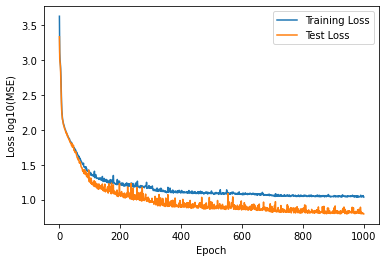

16/16 [==============================] - 0s 6ms/step - loss: 6.2341 - mean_absolute_error: 0.5737
mean squared error,  mean absolute error: [6.23406982421875, 0.5737171769142151]
CNN Output:  [135.1276    105.66521     1.2174815] Actual Label: [135 106   1]
CNN Output:  [135.37999  190.28476   12.155348] Actual Label: [135 189  12]
CNN Output:  [103.980194  204.30449     7.3345623] Actual Label: [104 204   7]
CNN Output:  [79.22319  10.119532 11.224676] Actual Label: [80 10 11]
CNN Output:  [123.50235  208.11852   13.308294] Actual Label: [123 208  13]
CNN Output:  [206.55656   10.066294  10.006392] Actual Label: [207  10  10]
CNN Output:  [78.426636 68.51917  13.281225] Actual Label: [78 68 13]
CNN Output:  [17.148922  10.933592   2.1191196] Actual Label: [16 10  2]
CNN Output:  [175.95067  84.24647  12.94319] Actual Label: [176  85  13]
CNN Output:  [63.152462  89.91353    2.1144772] Actual Label: [63 91  2]
CNN Output:  [118.971214   78.13259     3.1993618] Actual Label: [119  79   

In [19]:
input = Input(shape=(250,1))
# fully connected layer w/ 200 nodes
layer1 = Conv1D(filters=16, kernel_size = 3,activation="relu")(input)
layer1 = MaxPooling1D(2)(layer1)

layer2 = Conv1D(filters=64, kernel_size = 3,activation="relu")(layer1)
layer2 = MaxPooling1D(2)(layer2)

layer3 = Conv1D(filters=256, kernel_size = 3,activation="relu")(layer1)
layer3 = MaxPooling1D(2)(layer2)

layer4 = Flatten()(layer3)

layer5 = Dense(16, activation = "relu")(layer4)

output = Dense(3, activation="relu")(layer5)

# set the input and output layers
model = Model(inputs=input, outputs=output)
model.summary() # print layer info

# tell tensorflow what optimizer/loss function
model.compile(optimizer="adam",
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# now ready for data

allX = dataset # list of 1000-sample vectors
allY = labels # list of labels

#print(allX)

trainX = []; testX = []
trainY = []; testY = []

N = len(allX)
indexes = list(range(N))
np.random.shuffle(indexes)

M = int(N* 0.2) # 80/20 train/test split

for idx in indexes[0:M] :
    testX.append(allX[idx])
    testY.append(allY[idx])


for idx in indexes[M:] :
    trainX.append(allX[idx])
    trainY.append(allY[idx])


# ok, now we're ready to train.
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

print('Train X: ', trainX)
print('Train Y: ', trainY)
print('Test X: ' , testX)
print('Test Y: ' , testY)
      

history = model.fit(trainX, trainY, epochs=1000, batch_size=100,
          validation_data=(testX, testY))

#here we go.

training_loss = np.log10(history.history['loss'])
test_loss = np.log10(history.history ['val_loss'])

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.legend(["Training Loss","Test Loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss log10(MSE)')
plt.show()

#results = model.evaluate(testX, testY, batch_size=128)
#print("test loss, test acc:", results)

results = model.evaluate(testX, testY, batch_size=128)
print("mean squared error,  mean absolute error:", results)

test_X = testX[0:20]
test_Y = testY[0:20]
results = model.predict(test_X)

for i in range(20):
    print("CNN Output: ", results[i], "Actual Label:", test_Y[i])

CNN Output:  [102.642586 120.95468   11.371332] Actual:  [103 122  11]


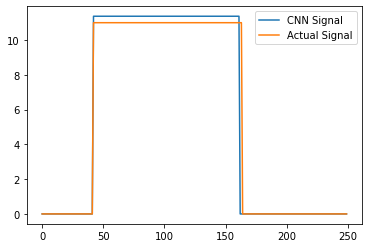

CNN Output:  [168.27266  149.5157     8.656767] Actual:  [166 150   9]


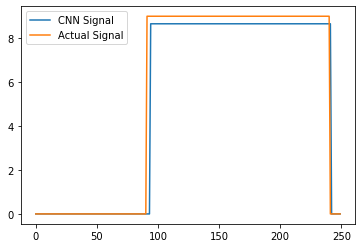

CNN Output:  [20.042273  10.931834   4.8531747] Actual:  [11 12  5]


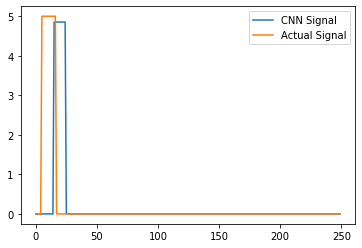

CNN Output:  [206.70947   27.089731   9.795922] Actual:  [207  26  10]


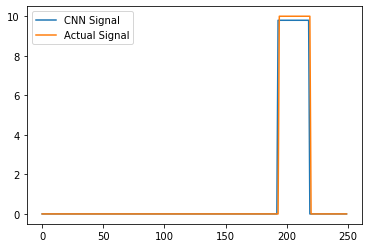

CNN Output:  [ 97.93927   123.79222     2.8342671] Actual:  [100 123   3]


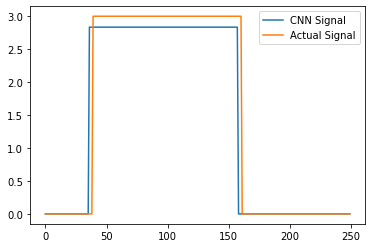

CNN Output:  [187.12201   53.1325    10.394876] Actual:  [187  55  11]


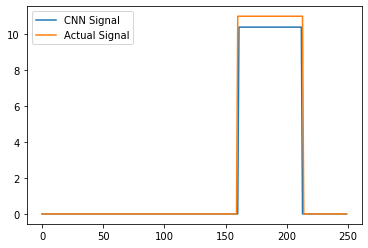

CNN Output:  [89.81685   35.195488   6.6049457] Actual:  [92 35  7]


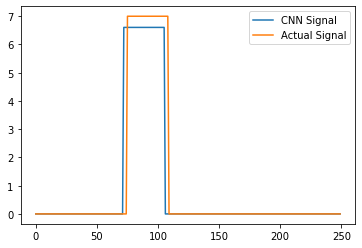

CNN Output:  [167.43681    70.88174     2.0363731] Actual:  [174  71   1]


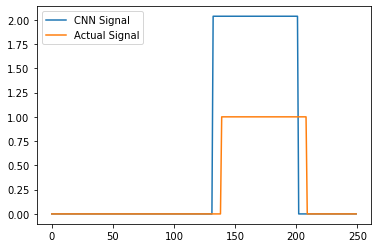

CNN Output:  [26.402279  18.744984   6.2938724] Actual:  [28 19  7]


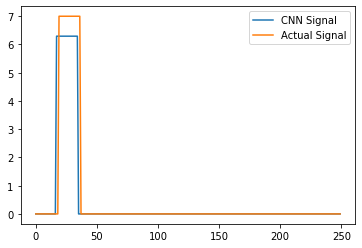

CNN Output:  [112.21337   126.12068     1.6957972] Actual:  [111 128   2]


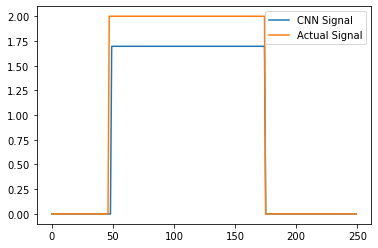

In [18]:
for i in range(10):
    print("CNN Output: ", results[i], "Actual: ", test_Y[i])
    nn_sig = np.zeros(250)
    label_sig = np.zeros(250)
    nn_sig[int(results[i,0])-int(results[i,1]/2):int(results[i,0]) + int(results[i,1]/2)] = results[i,2]
    #nn_sig[int(results[i,1]):int(results[i,1])+int(results[i,0]/2)] = results[i,2]
    
    label_sig[int(test_Y[i,0]-int(test_Y[i,1]/2)):int(test_Y[i,0])+int(test_Y[i,1]/2)] = test_Y[i,2]
    #label_sig[int(test_Y[i,0]):int(test_Y[i,1])+int(test_Y[i,0]/2)] = test_Y[i,2]
    plt.plot(nn_sig)
    plt.plot(label_sig)
    plt.legend(["CNN Signal", "Actual Signal"])
    plt.show()